In [4]:
from pettingzoo import AECEnv
from pettingzoo.utils import agent_selector, wrappers
from pettingzoo.classic import chess_v6
import time
import pygame
import numpy as np
import gymnasium
import chess as ChessApi
import chess.engine as chess_engine
from chess import SQUARES, Move
import re
from pettingzoo.classic import chess
from pettingzoo.classic.chess.chess_utils import mirror_move, square_to_coord, get_move_plane
from IPython.display import display, HTML, clear_output
from gymnasium.utils import EzPickle
import pickle
import os
import pandas as pd
import random
from collections import defaultdict
import hashlib

def env(**kwargs):
    env = raw_env(**kwargs)
    env = wrappers.TerminateIllegalWrapper(env, illegal_reward=-1)
    env = wrappers.AssertOutOfBoundsWrapper(env)
    env = wrappers.OrderEnforcingWrapper(env)
    return env

class raw_env(chess_v6.raw_env):
    
    def __init__(self, render_mode: str | None = None, screen_height: int | None = 400):
        # EzPickle.__init__(self, render_mode, screen_height)
        super().__init__(render_mode, screen_height)
        self.last_action = -1
        self.next_board = None

    def step(self, action):
        super().step(action)
        self.last_action = action
        self.next_board = self.board

    def last(self):
        observation, reward, termination, truncation, info = super().last()

        if reward == 0:
            reward = -0.001 # negative reward by steps
        
        return (observation, reward, termination, truncation, info)

    def render(self):
        clear_output(wait=True)
        display(self.board)

def is_empty_mask(observation):
    mask = observation["action_mask"]
    is_empty = len([i for i, x in enumerate(mask) if x == 1]) <= 0
    return is_empty

def epsilon_greedy_policy(state,Q, observation):
    epsilon = 0.5
    mask = observation["action_mask"]

    # select an action between valid moves with greedy
    if random.uniform(0,1) < epsilon:
        action = np.random.choice([i for i, x in enumerate(mask) if x == 1])
        return action
    # explotation
    else:
        mask_list = [i for i, x in enumerate(mask) if x == 1]
        return max(list(mask_list), key = lambda x: Q[(state,x)]) 

def get_state(board):
    arr = board_to_int(board)
    str_board = "".join(str(x) for x in board_to_int(board))
    my_hash = int(hashlib.sha512(str_board.encode('utf-8')).hexdigest(), 16)
    return str(my_hash)

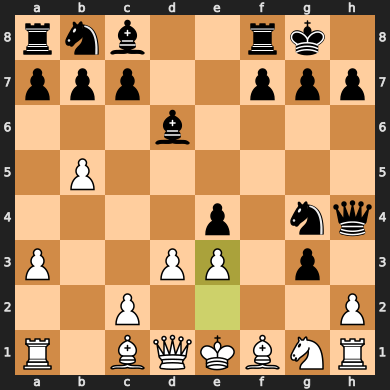

+1070
white score:
1070
black score:
1070




KeyboardInterrupt: 

In [5]:

engine = chess_engine.SimpleEngine.popen_uci("D:\projects\chess-environment\stockfish-windows-x86-64-avx2.exe")

my_env = env(render_mode="ansi")

def board_to_int(board):
    return [
            (
                 board.piece_type_at(sq) if  board.piece_type_at(sq) else 0
            ) * (
                -1 if  board.color_at(sq)==False else 1 
            ) 
             for sq in SQUARES
        ]

def get_action_index(uci_move):
    TOTAL = 73
    move = Move.from_uci(uci_move)
    source = move.from_square

    coord = square_to_coord(source)
    panel = get_move_plane(move)
    cur_action = (coord[0] * 8 + coord[1]) * TOTAL + panel

    return cur_action

def play():
    for agent in my_env.agent_iter():
        # pygame.event.get()
        observation, reward, termination, truncation, info = my_env.last()
    
        if termination or truncation:
            action = None
        else:
            mask = observation["action_mask"]
            legal = [i for i, x in enumerate(mask) if x == 1]

            if agent == 'player_1':
                result = engine.play(my_env.board, chess_engine.Limit(time=0.01, depth=1, nodes=1))
                move = mirror_move(result.move)
                uci_move = move.uci()
                action = get_action_index(uci_move)
                
            else:
                # TODO: put a policy here!!!
                action = np.random.choice([i for i, x in enumerate(mask) if x == 1])

        my_env.step(action)

        info = engine.analyse(my_env.board, ChessApi.engine.Limit(depth=20))

    
        my_env.render()

        print(info['score'].relative)
        print('white score:')
        print(info['score'].black().score(mate_score=100000))
        print('black score:')
        print(info['score'].black().score(mate_score=100000))
        print('\n')
    # my_env.close()

# for i in range(0, 10):
#     my_env.reset(seed=42)
#     play()
#     time.sleep(1)

my_env.reset(seed=42)
play()

+10
-10
10


+90
90
-90


-67
67
-67




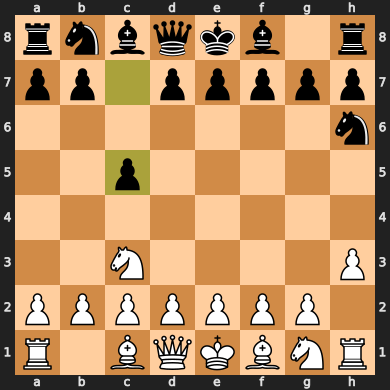

+71


AttributeError: 'int' object has no attribute 'score'

In [20]:

my_env = env(render_mode="ansi")
my_env.reset()

observation, reward, termination, truncation, info = my_env.last()
mask = observation["action_mask"]
action = np.random.choice([i for i, x in enumerate(mask) if x == 1])
my_env.step(action)
info = engine.analyse(my_env.board, ChessApi.engine.Limit(depth=20))

print(info['score'].relative)
print(info['score'].white().score(mate_score=100000))
print(info['score'].black().score(mate_score=100000))
print('\n')

observation, reward, termination, truncation, info = my_env.last()
mask = observation["action_mask"]
action = np.random.choice([i for i, x in enumerate(mask) if x == 1])
my_env.step(action)
info = engine.analyse(my_env.board, ChessApi.engine.Limit(depth=20))


print(info['score'].relative)
print(info['score'].white().score(mate_score=100000))
print(info['score'].black().score(mate_score=100000))
print('\n')

observation, reward, termination, truncation, info = my_env.last()
mask = observation["action_mask"]
action = np.random.choice([i for i, x in enumerate(mask) if x == 1])
my_env.step(action)
info = engine.analyse(my_env.board, ChessApi.engine.Limit(depth=20))

print(info['score'].relative)
print(info['score'].white().score(mate_score=100000))
print(info['score'].black().score(mate_score=100000))
print('\n')

observation, reward, termination, truncation, info = my_env.last()
mask = observation["action_mask"]
action = np.random.choice([i for i, x in enumerate(mask) if x == 1])
my_env.step(action)
info = engine.analyse(my_env.board, ChessApi.engine.Limit(depth=20))

# clear_output(wait=True)
display(my_env.board)

print(info['score'].relative)
print(info['score'].white().score(mate_score=1000))
print(info['score'].black().score(mate_score=1000))
print('\n')

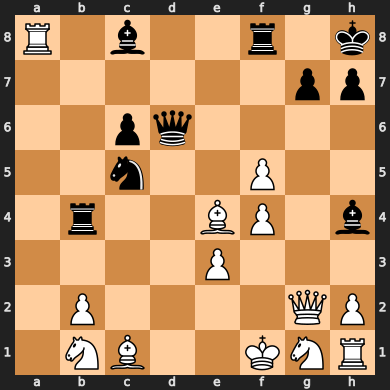

Score white: -99999
Score black: 99999


In [33]:
engine = chess_engine.SimpleEngine.popen_uci("D:\projects\chess-environment\stockfish-windows-x86-64-avx2.exe")
board = ChessApi.Board("R1b2r1k/6pp/2pq4/2n2P2/1r2BP1b/4P3/1P4QP/1NB2KNR b - - 2 22")
info = engine.analyse(board, ChessApi.engine.Limit(depth=20))

display(board)
print("Score white:", info["score"].white().score(mate_score=100000))
print("Score black:", info["score"].black().score(mate_score=100000))

### Implement Monte Carlo Experiment

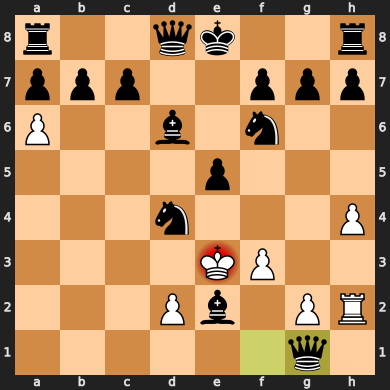

                                      state_action pair     value
0     (364546289454675078966569533269716403314893169...  -99935.0
1     (364546289454675078966569533269716403314893169... -100314.0
2     (364546289454675078966569533269716403314893169...  -99982.0
3     (364546289454675078966569533269716403314893169... -100070.0
4     (364546289454675078966569533269716403314893169... -100542.0
...                                                 ...       ...
2275  (124287107215439789958958283604879426764864413... -100000.0
2276  (173840271770555723674298701082801947172599485...  -99004.0
2277  (100436303415112085673833480783888486482316216... -100000.0
2278  (147649496461803392669076017212195720313113161...  -99001.0
2279  (993264518283515721353236036980843925944027860... -100000.0

[402 rows x 2 columns]


,state_action pair,value
0,(364546289454675078966569533269716403314893169...,-99935.0
1,(364546289454675078966569533269716403314893169...,-100314.0
2,(364546289454675078966569533269716403314893169...,-99982.0
3,(364546289454675078966569533269716403314893169...,-100070.0
4,(364546289454675078966569533269716403314893169...,-100542.0
...,...,...
995,(229161284038401564178751698040436362687431505...,0.0
996,(229161284038401564178751698040436362687431505...,0.0
997,(229161284038401564178751698040436362687431505...,0.0
998,(229161284038401564178751698040436362687431505...,0.0


In [6]:
Q = defaultdict(float)
N = defaultdict(int)
total_return = defaultdict(float)

path = 'montecarlo.pickle'

# if os.path.isfile(path):
#     with open(path, "rb") as f:
#         Q = pickle.load(f)

print(Q)
print(N)


def generate_episode(Q, render=False):
    episode = []
    my_env.reset()

    last_white_action = None
    last_black_action = None

    for agent in my_env.agent_iter():
        observation, reward, termination, truncation, info = my_env.last()

        action = -1
        
        if termination or truncation:
            if agent == 'player_0':
                state = get_state(my_env.board)
                episode.append((state, last_white_action, reward * 100000))
                
            if agent == 'player_1':
                state = get_state(my_env.board)
                episode.append((state, last_black_action, reward * 100000))
            break
        if action:
            # computer move
            if agent == 'player_1':
                result = engine.play(my_env.board, chess_engine.Limit(depth=5))
                move = mirror_move(result.move)
                uci_move = move.uci()
                action = get_action_index(uci_move)
                state = get_state(my_env.board)

                
                # state = get_state(my_env.board)
                # action = epsilon_greedy_policy(state, Q, observation)

                # analyse and get the reward for black
                info = engine.analyse(my_env.next_board, ChessApi.engine.Limit(depth=10))

                relative_reward = info['score'].black().score(mate_score=1000)
                
                my_env.step(action)

                episode.append((state, action, relative_reward))

                last_black_action = action
            else:
                # TODO: put a policy here!!!
                state = get_state(my_env.board)
                action = epsilon_greedy_policy(state, Q, observation)
                my_env.step(action)

                info = engine.analyse(my_env.next_board, ChessApi.engine.Limit(depth=10))

                relative_reward = info['score'].white().score(mate_score=1000)
 
                episode.append((state, action, relative_reward))

                last_white_action = action
            if render:
                my_env.render()
    return episode

num_iterations = 10

for i in range(num_iterations):
    render = True
    if i >= num_iterations - 2:
        render = True
    episode = generate_episode(Q, render)
    # print(f'last episode: {episode[-1]}')
    all_state_action_pairs = [(s, a) for (s,a,r) in episode]
    rewards = [r for (s,a,r) in episode]
    for t, (state, action,_) in enumerate(episode):
        # if not (state, action) in all_state_action_pairs[0:t]:
        R = sum(rewards[t:])
        total_return[(state,action)] = total_return[(state,action)] + R
        N[(state, action)] += 1
        Q[(state,action)] = total_return[(state, action)] / N[(state, action)]

df = pd.DataFrame(Q.items(),columns=['state_action pair','value'])
print(df[df['value'] != 0])
df.head(1000)

# save model
# with open(path, "wb") as f:
#     pickle.dump(Q, f)

### Sarsa Experiment using different boards as environment

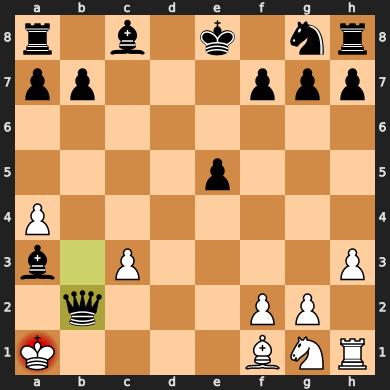

                                         state_action pair       value
1        (847335142103253879742580824623106595001316910...   71.107804
21       (313275106355399479504978803672601451994563255... -206.875392
23       (455825303987118043326496507539295625617236674...  200.654433
41       (350234362102941121448619536006061460033824296... -272.343254
43       (114132659124033618729261323605601360744703273...  270.470591
...                                                    ...         ...
8538848  (121472043548283353235241231530374157988298098... -848.300000
8538850  (927053679484957982622517086670883118695064437...  849.150000
8538852  (852778605735137041309092515217039826680688048... -849.150000
8538854  (109470991419205419617097025835604315224715352...  850.000000
8538855  (232094167770126043196381766106279007045437780... -850.000000

[1274888 rows x 2 columns]


In [46]:
import pandas as pd
import random
from collections import defaultdict

Q = defaultdict(float)

alpha = 0.85
gamma = 0.95

path = 'sarsa.pickle'
if os.path.isfile(path):
    with open(path, "rb") as f:
        Q = pickle.load(f)

df = pd.DataFrame(Q.items(),columns=['state_action pair','value'])
print(df[df['value'] != 0])
df.head(1000)

def update_table(state, next_state, reward, action, next_action):
    target = reward + gamma * Q[next_state, next_action]
    Q[state, action] += alpha * (target - Q[state, action])

def update_table_terminal(state, reward, action):
    Q[state, action] += alpha * (reward - Q[state, action])

# Starting the SARSA learning
total_episodes = 15000

for episode in range(total_episodes):
    my_env.reset()
    render = False

    if episode > total_episodes - 2:
        render = True

    action_white = -1
    action_black = -1
    
    last_action_white = -1
    last_action_black = -1
    last_state_white = -1
    last_state_black = -1

    # alternate episode computer
    is_computer_white = episode % 2 == 0
    
    for agent in my_env.agent_iter():
        observation, reward, termination, truncation, info = my_env.last()
        
        if termination or truncation:
            if agent == 'player_0' and last_state_white != -1:
                update_table_terminal(last_state_white, reward * 1000, last_action_white)
            if agent == 'player_1' and last_state_black != -1:
                update_table_terminal(last_state_black, reward * 1000, last_action_black)
            break

        # black/computer
        if agent == 'player_1':
            if is_computer_white:
                action = epsilon_greedy_policy(state, Q, observation)
            else:
                result = engine.play(my_env.board, chess_engine.Limit(depth=5))
                move = mirror_move(result.move)
                uci_move = move.uci()
                action = get_action_index(uci_move)
            state = get_state(my_env.board)
            
            my_env.step(action)

            info = engine.analyse(my_env.next_board, ChessApi.engine.Limit(depth=10))

            relative_reward = info['score'].black().score(mate_score=1000)

            if last_action_black != -1:
                update_table(last_state_black, state, relative_reward, last_action_black, action)

            last_state_black = get_state(my_env.next_board)
            last_action_black = action

        # white
        else:
            # TODO: put a policy here!!!
            # state = get_state(my_env.board)
            # action = epsilon_greedy_policy(state, Q, observation)

            if is_computer_white:
                result = engine.play(my_env.board, chess_engine.Limit(depth=5))
                move = result.move
                uci_move = move.uci()
                action = get_action_index(uci_move)
            else:
                action = epsilon_greedy_policy(state, Q, observation)
                
            state = get_state(my_env.board)
            
            my_env.step(action)

            info = engine.analyse(my_env.next_board, ChessApi.engine.Limit(depth=10))

            relative_reward = info['score'].white().score(mate_score=1000)

            if last_action_white != -1:
                update_table(last_state_white, state, relative_reward, last_action_white, action)

            last_state_white = get_state(my_env.next_board)
            last_action_white = action
        if render:
            my_env.render()


df = pd.DataFrame(Q.items(),columns=['state_action pair','value'])
print(df[df['value'] != 0])
df.head(1000)

#save model
with open(path, "wb") as f:
    pickle.dump(Q, f)

In [91]:
print(df.iloc[1]['state_action pair'])
state = '8473351421032538797425808246231065950013169108310656536609965581005618569459501338043358030786941912371217480946419240142339530461835450212812641642550979'
a_ = np.argmax([Q[(state, a)] for a in range(4672)])
print(a_)
print(Q[(state, a_)])

('8473351421032538797425808246231065950013169108310656536609965581005618569459501338043358030786941912371217480946419240142339530461835450212812641642550979', 2421)
2421
71.10780440219887


In [95]:
Q = defaultdict(float)

# TODO: verify the argmax is correctly
def get_max(state, Q):
    # res = []
    # for sub in Q:
    #     if sub and sub[0] == state:
    #         res.append(sub[1])

    # if len(res) == 0:
    #     print('zero...')
    #     return None
    a_ = np.argmax([Q[(state, a)] for a in range(4672)])
    # print('not zero...')
    # print(f'correct action {a_}')
    # print(f'correct value {Q[(state, a_)]}')
    # action = np.max(res)
    # print(f'wrong action {action}')
    # print(f'wrong value {Q[(state, action)]}')
    return a_

path = 'sarsa.pickle'
if os.path.isfile(path):
    with open(path, "rb") as f:
        Q = pickle.load(f)

my_env.reset()

for agent in my_env.agent_iter():
        observation, reward, termination, truncation, info = my_env.last()
        if termination or truncation:
            break

        state = get_state(my_env.board)

        print(f'state {state}')
        action = get_max(state, Q)
        print(f'action: {action}')
        if action not in observation["action_mask"]:
            print('invalid action')
            action = epsilon_greedy_policy(state, Q, observation)
        if not action:
            print('empty action')
            action = epsilon_greedy_policy(state, Q, observation)
        my_env.step(action)
        # my_env.render()

state 3645462894546750789665695332697164033148931698415489035931792360616446201451183958764252281558216476917273496529132238503033348273099381410312859692422996
action: 0
empty action
state 8473351421032538797425808246231065950013169108310656536609965581005618569459501338043358030786941912371217480946419240142339530461835450212812641642550979
action: 2421
invalid action
state 4387174515574207044859228167525114274058164716003749491002592965884160650088173420292295673565341364296602163044158875357650783305732287220597954188762291
action: 0
empty action
state 8564003871503924999699995597906383070158126212705381263681068869509698835349519129256167128466003969664293280389099123971636313203669842766355193557720964
action: 0
empty action
state 4985595584131023387977417812523378825960482318970968292421733747038776835142703669961355026854689868079474452198210380821596431902645780365954044236500925
action: 0
empty action
state 182399784341438298663839167371248951071660955759831357065376341628831

### Sarsa Experiment using board as environment

In [99]:
Q_table = {}

for s in range(64): # board size
    for a in range(4672): # we have 4672 actions
        Q_table[(s,a)] = 0.0

len(Q_table)

299008